![This is an image](https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview.png)
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: SARAVANAVEL***

# ***BEGINNER LEVEL TASK***
### Task 2 -Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
#checking my tensorflow version
tf.__version__

'2.5.0'

## Loading the Dataset

In [3]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df=df. iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


## Data Preprocessing

In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.shape

(2035, 8)

In [7]:
df_high=df.reset_index()['High']

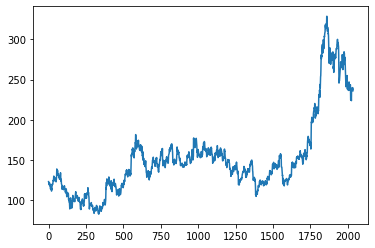

In [8]:
plt.plot(df_high)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [9]:
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [10]:
df_high.shape

(2035, 1)

In [11]:
df_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [12]:
#Split the data into train and test split
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [13]:
training_size,test_size

(1526, 509)

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [17]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [18]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

## Create the LSTM Model

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 8s 159ms/step - loss: 0.0101 - val_loss: 0.0294
Epoch 2/100
23/23 [==============================] - 3s 129ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 3/100
23/23 [==============================] - 3s 130ms/step - loss: 7.9501e-04 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 3s 130ms/step - loss: 7.3737e-04 - val_loss: 0.0035
Epoch 5/100
23/23 [==============================] - 3s 130ms/step - loss: 7.9820e-04 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 3s 133ms/step - loss: 6.8169e-04 - val_loss: 0.0035
Epoch 7/100
23/23 [==============================] - 5s 217ms/step - loss: 6.9383e-04 - val_loss: 0.0039
Epoch 8/100
23/23 [==============================] - 5s 214ms/step - loss: 6.4192e-04 - val_loss: 0.0023
Epoch 9/100
23/23 [==============================] - 5s 219ms/step - loss: 6.2480e-04 - val_loss: 0.0024
Epoch 10/100
23/23 [==============================] - 5s 211ms/

23/23 [==============================] - 5s 207ms/step - loss: 1.2212e-04 - val_loss: 5.6435e-04
Epoch 78/100
23/23 [==============================] - 5s 207ms/step - loss: 1.2458e-04 - val_loss: 3.5245e-04
Epoch 79/100
23/23 [==============================] - 5s 205ms/step - loss: 1.2103e-04 - val_loss: 0.0012
Epoch 80/100
23/23 [==============================] - 5s 206ms/step - loss: 1.4198e-04 - val_loss: 5.4064e-04
Epoch 81/100
23/23 [==============================] - 5s 205ms/step - loss: 1.2309e-04 - val_loss: 5.4857e-04
Epoch 82/100
23/23 [==============================] - 5s 206ms/step - loss: 1.7783e-04 - val_loss: 0.0019
Epoch 83/100
23/23 [==============================] - 5s 206ms/step - loss: 1.4772e-04 - val_loss: 3.8764e-04
Epoch 84/100
23/23 [==============================] - 5s 207ms/step - loss: 1.3549e-04 - val_loss: 5.8556e-04
Epoch 85/100
23/23 [==============================] - 5s 207ms/step - loss: 1.2493e-04 - val_loss: 0.0015
Epoch 86/100
23/23 [===============

In [22]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [23]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

135.33142776990132

In [25]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

229.71116726248746

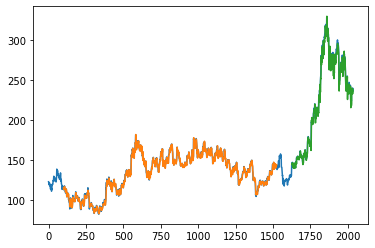

In [26]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- Green indicates the Predicted Data
- Blue indicates the Complete Data
- Orange indicates the Train Data

### Predict the next 28 days Stock Price

In [27]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [28]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [30]:
lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60965455]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

11 day output [[0.4368521]]
12 day input [0.70217524 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205
 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875
 0.76621264 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815
 0.78003659 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055
 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485
 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169
 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687
 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537
 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639
 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603
 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987 0.63651149
 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574
 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264 0.57288067
 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567  0.63590161
 0.62594023 0.6391543  

22 day output [[0.3815362]]
23 day input [0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0.6391543  0.62614353 0.62268754 0.60965455
 0.59164059 0.57197404 0.55217737 0.53292751 0.51468849 0.497785
 0.48242092 0.46868929 0.

In [31]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [32]:
day_new.shape

(100,)

In [33]:
day_pred.shape

(28,)

In [34]:
df3 = df_high.tolist()
df3.extend(lst_output)

In [35]:
len(df_high)

2035

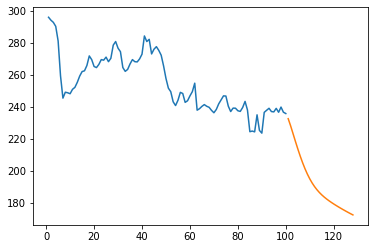

In [36]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

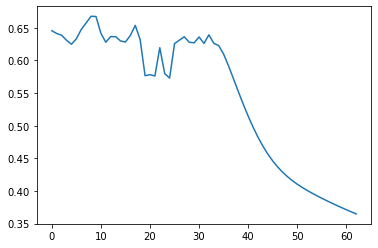

In [37]:
df3=df_high.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [38]:
df3=scaler.inverse_transform(df3).tolist()

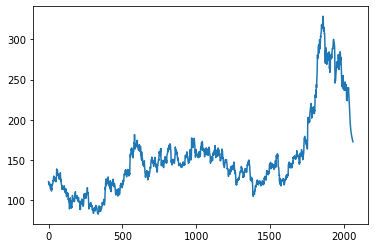

In [39]:
plt.plot(df3)

# THANK YOU!!